# SWAT Image Classification MNIST Fashion

The Modified National Institute of Standards and Technology Fashion (**MNIST Fashion**) data set contains images of clothing from the Zalando company. Approximately 15,000 images have been sampled from the data set to train an image classification model using the image pixels. Each image is a 28x28 grayscale pixel bounding box saved as a separate PNG files. Below are 10 images of each type of clothing. 

![title](mnist_fashion_sample.png)

# Load Packages

In [1]:
import swat
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
swat.options.cas.print_messages = True

# Connect to CAS

In [2]:
conn = swat.CAS("server", 30571, "student", "Metadata0")

# Add a caslib

In [3]:
conn.table.addCaslib(name="mycl", path="/workshop/winsas/VOSI", subDirectories = True, dataSource="PATH", activeOnAdd=False)

NOTE: Cloud Analytic Services added the caslib 'mycl'.


,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
0,mycl,PATH,,/workshop/winsas/VOSI/,,1.0,1.0,0.0,0.0,0.0,0.0


# Load Images

In [4]:
conn.loadActionSet('image')
actions = conn.builtins.help(actionSet='image')

NOTE: Added action set 'image'.
NOTE: Information for action set 'image':
NOTE:    image
NOTE:       loadImages - Loads images
NOTE:       saveImages - Writes images contained in a CAS table to disk
NOTE:       compareImages - Compares images in one CAS table with those in another
NOTE:       processImages - Performs core image processing functions
NOTE:       augmentImages - Augment images by creating patches and mutating them
NOTE:       flattenImages - Convert image tables into wide format (one column per pixel)
NOTE:       flattenImageTable - Convert image tables into wide format (one column per pixel)
NOTE:       summarizeImages - Read an image table and extract information about the images it contains
NOTE:       matchImages - Match a template image against a table of images
NOTE:       fetchImages - Fetch images for displaying
NOTE:       condenseImages - Condenses pixel values into a CAS image table.
NOTE:       extractDetectedObjects - Extracts object detections.
NOTE:       a

In [5]:
conn.image.loadImages(
    caslib='mycl',
    path='mnist_fashion',
    recurse=True, 
    decode=True,
    distribution="random", 
    labelLevels=1,
    casout=dict(name='fashion', blocksize='128',replace=True)
)

indata = 'fashion'

NOTE: Loaded 15000 images from /workshop/winsas/VOSI/mnist_fashion into Cloud Analytic Services table fashion.


In [6]:
conn.image.summarizeImages(imagetable=indata)

NOTE: The table FASHION contains decoded images.
NOTE: 15000 out of 15000 images were scanned and results were saved to the summary table.


,Column,png,minWidth,maxWidth,minHeight,maxHeight,meanWidth,meanHeight,mean1stChannel,min1stChannel,max1stChannel,mean2ndChannel,min2ndChannel,max2ndChannel,mean3rdChannel,min3rdChannel,max3rdChannel
0,_image_,15000.0,28.0,28.0,28.0,28.0,28.0,28.0,72.627468,0.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
conn.table.columnInfo(table=indata)

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,_dimension_,,1,int64,8,12,,0,0
1,_resolution_,,2,varbinary,16,16,,0,0
2,_imageFormat_,,3,int64,8,12,,0,0
3,_image_,,4,varbinary(image),784,784,,0,0
4,_size_,,5,int64,8,12,,0,0
5,_path_,,6,varchar,54,54,,0,0
6,_label_,,7,varchar,6,6,,0,0
7,_type_,,8,char,3,3,,0,0
8,_id_,,9,int64,8,12,,0,0


In [8]:
conn.loadActionSet('simple')
actions = conn.builtins.help(actionSet='simple')

NOTE: Added action set 'simple'.
NOTE: Information for action set 'simple':
NOTE:    simple
NOTE:       mdSummary - Calculates multidimensional summaries of numeric variables
NOTE:       numRows - Shows the number of rows in a Cloud Analytic Services table
NOTE:       summary - Generates descriptive statistics of numeric variables such as the sample mean, sample variance, sample size, sum of squares, and so on
NOTE:       correlation - Computes Pearson product-moment correlations.
NOTE:       regression - Performs a linear regression up to 3rd-order polynomials
NOTE:       crossTab - Performs one-way or two-way tabulations
NOTE:       distinct - Computes the distinct number of values of the variables in the variable list
NOTE:       topK - Returns the top-K and bottom-K distinct values of each variable included in the variable list based on a user-specified ranking order
NOTE:       groupBy - Builds BY groups in terms of the variable value combinations given the variables in the variab

In [9]:
conn.simple.freq(
    table = indata,
    inputs = '_label_'
)['Frequency']

,Column,CharVar,FmtVar,Level,Frequency
0,_label_,class0,class0,1,1500.0
1,_label_,class1,class1,2,1500.0
2,_label_,class2,class2,3,1500.0
3,_label_,class3,class3,4,1500.0
4,_label_,class4,class4,5,1500.0
5,_label_,class5,class5,6,1500.0
6,_label_,class6,class6,7,1500.0
7,_label_,class7,class7,8,1500.0
8,_label_,class8,class8,9,1500.0
9,_label_,class9,class9,10,1500.0


# Partition the Data

In [10]:
conn.loadActionSet('sampling')
actions = conn.builtins.help(actionSet='sampling')

NOTE: Added action set 'sampling'.
NOTE: Information for action set 'sampling':
NOTE:    sampling
NOTE:       srs -  Samples a proportion of data from the input table or partitions the data into no more than three portions
NOTE:       stratified - Samples a proportion of data or partitions the data into no more than three portions within each stratum
NOTE:       oversample - Samples a user-specified proportion of data from the event level and adjusts the ratio between rare events and non-rare events to a user-specified ratio
NOTE:       kfold - K-fold partitioning.


In [11]:
conn.sampling.srs(
    table = indata,
    samppct = 40,
    samppct2 = 30,
    seed = 802,
    partind = True,
    output  = dict(casOut = dict(name = indata, replace = True), copyVars = 'ALL')
)

NOTE: Simple Random Sampling is in effect.
NOTE: Using SEED=802 for sampling.


[OutputCasTables]

              casLib     Name Label   Rows  Columns                                        casTable
 0  CASUSER(student)  fashion        15000       10  CASTable('fashion', caslib='CASUSER(student)')

[SRSFreq]

 Frequencies
 
     NObs  NSamp1  NSamp2
 0  15000    6000    4500

+ Elapsed: 0.0544s, user: 0.0496s, sys: 0.0208s, mem: 52.8mb

# Shuffle the Data

In [12]:
conn.table.shuffle(
    table = indata,
    casOut = dict(name=indata, replace=True)
)

[caslib]

 'CASUSER(student)'

[tableName]

 'FASHION'

[casTable]

 CASTable('FASHION', caslib='CASUSER(student)')

+ Elapsed: 0.0289s, user: 0.013s, sys: 0.0335s, mem: 44.1mb

# Build the Model

In [13]:
conn.loadActionSet('deepLearn')
actions = conn.builtins.help(actionSet='deepLearn')

NOTE: Added action set 'deepLearn'.
NOTE: Information for action set 'deepLearn':
NOTE:    deepLearn
NOTE:       buildModel - Creates an empty Deep Learning model
NOTE:       addLayer - Adds a layer to a Deep Learning model
NOTE:       removeLayer - Removes a layer from a Deep Learning model
NOTE:       dlPrune - Prunes a layer in a Deep Learning model
NOTE:       modelInfo - Displays model information
NOTE:       dlTune - Tunes hyperparameters for Deep Learning model
NOTE:       dlTrain - Trains a Deep Learning model
NOTE:       dlScore - Scores a table using a Deep Learning model
NOTE:       dlExportModel - Exports a Deep Learning model
NOTE:       dlLabelTarget - Assigns the target label information
NOTE:       dlImportModelWeights - Imports model weights from an external source
NOTE:       dlJoin - Joins the data table and the annotation table


In [14]:
conn.deepLearn.buildModel(
    model = dict(name='cnn',replace=True),
    type = 'CNN'
)

conn.deepLearn.addLayer(
    model = 'cnn',
    layer = dict(type='input', nchannels=1, width=28, height=28, scale=0.004, std='STD'),
    replace=True,
    name = 'data'
)

conn.deepLearn.addLayer(
    model = 'cnn',
    layer = dict(type='convolution',act='relu', nFilters=10, width=5, height=5, stride=1, init='xavier'),
    srcLayers = 'data',
    replace=True,
    name = 'cnn1'
)

conn.deepLearn.addLayer(
    model = 'cnn',
    layer = dict(type='pooling', width=2, height=2, stride=2, pool='max'),
    srcLayers = 'cnn1',
    replace=True,
    name = 'pool1'
)

conn.deepLearn.addLayer(
    model = 'cnn',
    layer = dict(type='fullconnect', n=100, act='relu', init='xavier', dropout = 0.4),
    srcLayers = 'pool1',
    replace=True,
    name = 'fc1'
)

conn.deepLearn.addLayer(
    model = 'cnn',
    layer = dict(type='output', n=10, act='softmax', init='xavier'),
    srcLayers = 'fc1',
    replace=True,
    name = 'output'
)

conn.deepLearn.modelInfo(
    model='cnn'
)

,Descr,Value
0,Model Name,cnn
1,Model Type,Convolutional Neural Network
2,Number of Layers,5
3,Number of Input Layers,1
4,Number of Output Layers,1
5,Number of Convolutional Layers,1
6,Number of Pooling Layers,1
7,Number of Fully Connected Layers,1


# Train the Model

In [15]:
conn.deepLearn.dlTrain(
    table    = dict(name=indata, where='_PartInd_ = 1'),
    validTable = dict(name=indata, where='_PartInd_ = 2'),
    target = '_label_',
    inputs = '_image_',
    seed = '649',
    modelTable = 'cnn',
    modelWeights = dict(name='trained_weights', replace=True),
    optimizer = dict(miniBatchSize=64, maxEpochs=100,  loglevel=1,
                     algorithm=dict(method='momentum', learningRate=0.01))
)

NOTE:  Synchronous mode is enabled.
NOTE:  The total number of parameters is 197370.
NOTE:  The approximate memory cost is 106.00 MB.
NOTE:  The total number of threads on each worker is 16.
NOTE:  The maximum mini-batch size per thread on each worker is 64.
NOTE:  The maximum mini-batch size across all workers for the synchronous mode is 1024.
NOTE:  The optimization reached the maximum number of epochs.
NOTE:  The total time is      12.19 (s).


,Descr,Value
0,Model Name,cnn
1,Model Type,Convolutional Neural Network
2,Number of Layers,5
3,Number of Input Layers,1
4,Number of Output Layers,1
5,Number of Convolutional Layers,1
6,Number of Pooling Layers,1
7,Number of Fully Connected Layers,1
8,Number of Weight Parameters,197250
9,Number of Bias Parameters,120


# Score the Model

In [16]:
conn.deepLearn.dlScore(
    table = dict(name=indata, where='_PartInd_ = 0'),
    model = 'cnn',
    initWeights = 'trained_weights',
    copyVars = ['_label_','_image_'],
    layerImageType='jpg',
    casout = dict(name='cnn_scored', replace=True)
)

[OutputCasTables]

              casLib        Name  Rows  Columns                                           casTable
 0  CASUSER(student)  cnn_scored  4500       15  CASTable('cnn_scored', caslib='CASUSER(student)')

[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read          4500
 1  Number of Observations Used          4500
 2  Misclassification Error (%)          15.8
 3                   Loss Error      0.424788

+ Elapsed: 0.0583s, user: 0.255s, sys: 0.0184s, mem: 49.2mb

# Analyze Results Locally

In [17]:
crosstab = conn.simple.crossTab(
    table = 'cnn_scored',
    row = '_label_',
    col = '_DL_PredName_'
)['Crosstab']

crosstab = crosstab.drop('_label_',1)
crosstab

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,386.0,0.0,8.0,27.0,3.0,0.0,24.0,0.0,4.0,0.0
1,2.0,422.0,2.0,13.0,3.0,0.0,3.0,0.0,1.0,0.0
2,6.0,0.0,325.0,5.0,75.0,0.0,36.0,0.0,4.0,0.0
3,14.0,5.0,3.0,403.0,14.0,0.0,17.0,0.0,1.0,1.0
4,0.0,0.0,24.0,16.0,335.0,0.0,61.0,0.0,3.0,0.0
5,0.0,0.0,0.0,0.0,0.0,428.0,0.0,11.0,1.0,9.0
6,91.0,1.0,48.0,9.0,53.0,0.0,245.0,1.0,8.0,0.0
7,0.0,0.0,0.0,0.0,0.0,18.0,0.0,409.0,0.0,30.0
8,3.0,1.0,3.0,5.0,3.0,2.0,11.0,5.0,407.0,1.0
9,0.0,0.0,1.0,0.0,0.0,5.0,0.0,16.0,0.0,429.0


In [18]:
correct = pd.DataFrame(np.diagonal(crosstab)) / pd.DataFrame(crosstab.sum(axis=1))
miss = 1-correct
classes = pd.DataFrame(['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])

df = pd.concat([classes, correct, miss], axis=1)
df.columns = ['Label','Correct','Misclassified']
df

,Label,Correct,Misclassified
0,T-shirt/Top,0.853982,0.146018
1,Trouser,0.946188,0.053812
2,Pullover,0.720621,0.279379
3,Dress,0.879913,0.120087
4,Coat,0.763098,0.236902
5,Sandal,0.953229,0.046771
6,Shirt,0.537281,0.462719
7,Sneaker,0.894967,0.105033
8,Bag,0.922902,0.077098
9,Ankle Boot,0.951220,0.048780


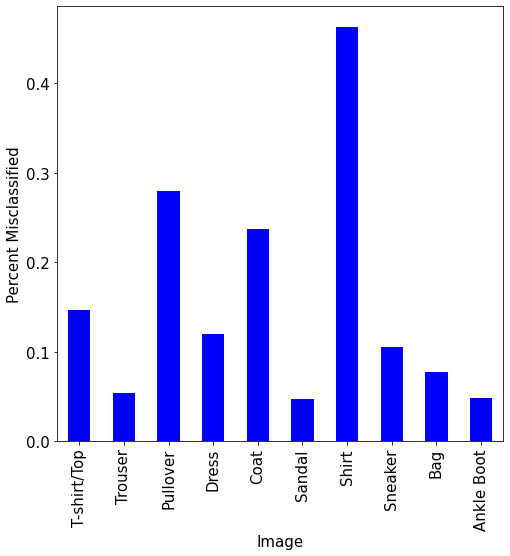

In [19]:
MisPlot = df.plot(x='Label', y='Misclassified', kind='bar', figsize=(8,8), fontsize=15, color='blue')
MisPlot.set_xlabel('Image', fontsize=15)
MisPlot.set_ylabel('Percent Misclassified', fontsize=15)
MisPlot.legend_.remove()
plt.show()

# End the Session

In [20]:
conn.session.endSession()

+ Elapsed: 0.000187s, sys: 0.000175s, mem: 0.203mb